In [3]:
!pip3 install pyro-ppl

In [5]:
import logging
import os

import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyro
import pyro.distributions as dist

### Task 1

In [95]:
def sample_model(n_samples):
    mus = torch.tensor([[1.,1.], [3., 5.]])#.expand(n_samples)
    covar = torch.tensor([[1., 0.], [0., 1.]])

    weights = torch.tensor([0.5, 0.5])

    with pyro.plate('z_plate', n_samples):
        z = pyro.sample("z", dist.Categorical(weights))

        #idk if we can index using z directly - couldn't find a clever way to do it (:
        selected_mus = torch.index_select(mus, 0, z)
        gms = pyro.sample("gms", dist.MultivariateNormal(selected_mus, covar))

        return z, gms


In [86]:
z, data = sample_model(500)

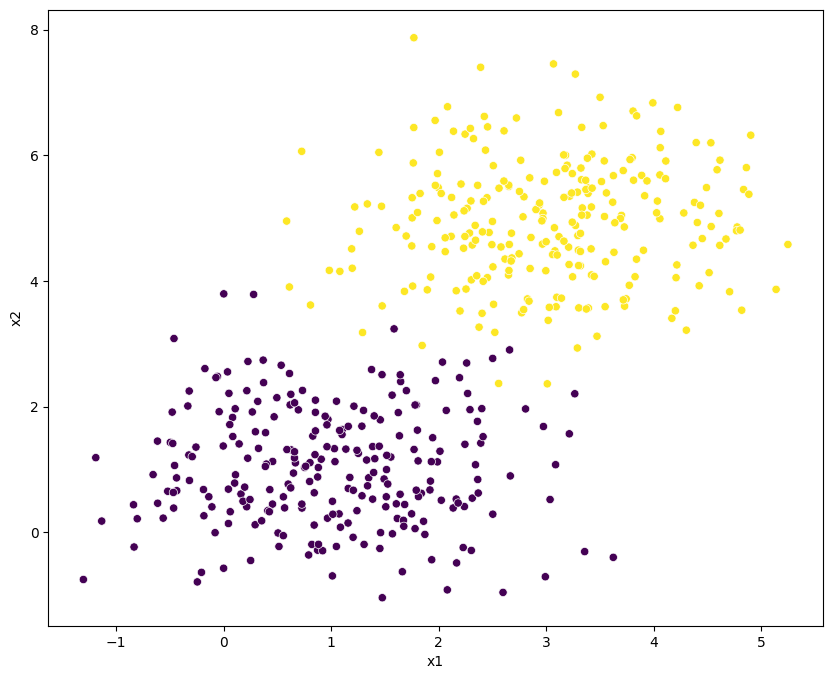

In [94]:
fig = plt.figure(figsize = (10, 8))
sns.scatterplot(x = data[:, 0], y = data[:, 1], c = z)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()